## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained EfficientNet.

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('/home/lingjia/Documents/diamond/EfficientNet'))
if module_path not in sys.path:
    sys.path.append(module_path)
import json
from PIL import Image
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet

In [4]:
# Load class names
labels_map = json.load(open('/home/lingjia/Documents/diamond_data/inclusion_classification/label_map.txt'))
labels_map = [labels_map[str(i)] for i in range(2)]
print(labels_map)
# 'class1':['Feather','Needle','Nick','Pit','Crystal'],
# 'class2':['Burn_mark','Internal_graining','Twinning_wisp','Cloud']

['Class1', 'Class2']


In [18]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224
# model = EfficientNet.from_pretrained(model_name)
model = EfficientNet.from_name(model_name,num_classes=2)

checkpoint_path = '/home/lingjia/Documents/diamond_result/cls_multi-class_EfficientNet/Cloud_Crystal/model_best.pth'
# checkpoint = torch.load(checkpoint_path)
# model.load_state_dict(checkpoint['state_dict'])


state_dict = torch.load(checkpoint_path)['state_dict']
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)


<All keys matched successfully>

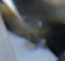

In [19]:
# Open image
img = Image.open('/home/lingjia/Documents/diamond_data/inclusion_classification/Patchs/test/class2/10349677844_168.png')
# Class 1
# 10349677844_133.png
# 10349677844_142.png
#
# 10352013444_7.png
# 10354541340_15.png

# Class 2
# 10349677844_168.png
# 10349677844_172.png
# 
# 10353242820_4.png

img


In [20]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)


In [21]:
# Classify with EfficientNet
model.eval()
with torch.no_grad():
    logits = model(img)
print(logits)

tensor([[ 1.6295, -1.6090]])


In [22]:
preds = torch.topk(logits, k=2).indices.squeeze(0).tolist()
print(preds)

probs = torch.softmax(logits, dim=1)
print(probs)


[0, 1]


In [23]:
print(probs)

tensor([[0.9623, 0.0377]])
